### Análisis y Predicción de Ventas en una Tienda de Retail (Core)


Parte III: Transformación y Análisis Avanzado de Datos con Pandas++

En esta tercera parte del proyecto, continuaremos trabajando con el dataset de ventas que utilizamos en la Parte II. En esta fase, aplicaremos técnicas avanzadas de transformación y análisis de datos utilizando las nuevas habilidades adquiridas en Pandas, tales como agrupaciones complejas y el uso del método apply. Nos enfocaremos en extraer insights más profundos y preparar los datos para futuros análisis y modelos predictivos.

**Transformación de Datos**


**Crea nuevas columnas:** Basándonos en los datos existentes, crea nuevas columnas que sean útiles para el análisis. Por ejemplo, calcula el ingreso total por venta y normaliza las ventas.

**Clasifica los datos:** Crea una columna que clasifique las ventas en categorías significativas (e.g., ‘Alta’, ‘Media’, ‘Baja’).


In [1]:
import pandas as pd
import numpy as np
import time

path = '../data/Sales_Transaction_v_4a.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
df.head(10)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
5,581475,12/9/2019,21705,Bag 500g Swirly Marbles,10.65,24,13069.0,United Kingdom
6,581475,12/9/2019,22118,Joy Wooden Block Letters,11.53,18,13069.0,United Kingdom
7,581475,12/9/2019,22119,Peace Wooden Block Letters,12.25,12,13069.0,United Kingdom
8,581475,12/9/2019,22217,T-Light Holder Hanging Lace,10.65,12,13069.0,United Kingdom
9,581475,12/9/2019,22216,T-Light Holder White Lace,10.55,24,13069.0,United Kingdom


**Agrupación y Agregación**

Agrupación por múltiples columnas: Realiza agrupaciones por categorías como producto y tienda, producto y mes, etc.

In [2]:
# Crear una nueva columna "Total Ve"
df['Ventas'] = df['Quantity'] * df['Price']

# Normalización Min-Max
df['Ventas_MinMax'] = (df['Ventas'] - df['Ventas'].min()) / (df['Ventas'].max() - df['Ventas'].min())

# Estandarización Z-score
df['Ventas_Z'] = (df['Ventas'] - df['Ventas'].mean()) / df['Ventas'].std()

# Definir una función para clasificar las ventas
def clasificar_ventas(venta):
    if venta >= 150:
        return 'Alta'
    elif 100 <= venta < 150:
        return 'Media'
    else:
        return 'Baja'

# Aplicar la función para crear una nueva columna
df['clasificacion'] = df['Ventas'].apply(clasificar_ventas)

print(df.head())


  TransactionNo       Date ProductNo                          ProductName  \
0        581482  12/9/2019     22485        Set Of 2 Wooden Market Crates   
1        581475  12/9/2019     22596  Christmas Star Wish List Chalkboard   
2        581475  12/9/2019     23235             Storage Tin Vintage Leaf   
3        581475  12/9/2019     23272    Tree T-Light Holder Willie Winkie   
4        581475  12/9/2019     23239    Set Of 4 Knick Knack Tins Poppies   

   Price  Quantity  CustomerNo         Country  Ventas  Ventas_MinMax  \
0  21.47        12     17490.0  United Kingdom  257.64       0.456022   
1  10.65        36     13069.0  United Kingdom  383.40       0.456090   
2  11.53        12     13069.0  United Kingdom  138.36       0.455957   
3  10.65        12     13069.0  United Kingdom  127.80       0.455951   
4  11.94         6     13069.0  United Kingdom   71.64       0.455921   

   Ventas_Z clasificacion  
0  0.063780          Alta  
1  0.119001          Alta  
2  0.011404   

In [3]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
df.head()

Número de registros duplicados: 5200


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Ventas,Ventas_MinMax,Ventas_Z,clasificacion
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,0.456022,0.063780,Alta
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,0.456090,0.119001,Alta
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,0.455957,0.011404,Media
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80,0.455951,0.006767,Media
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64,0.455921,-0.017893,Baja


In [4]:
# Eliminar duplicados en el mismo DataFrame
df.drop_duplicates(inplace=True)

In [5]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el núero de duplicados
num_duplicados =duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


In [6]:

print(df.isnull().sum())  # Cuenta cuántos valores nulos hay por columna
# Eliminar las filas que tengan un valor nulo en una columna específica
df.dropna(subset=['CustomerNo'], inplace=True)
# Agrupar por 'ProductName' y 'Country', seleccionando la columna 'Ventas'

grouped = df.groupby(['ProductName', 'Country'])['Ventas']


TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
Ventas            0
Ventas_MinMax     0
Ventas_Z          0
clasificacion     0
dtype: int64


## **Aplicar funciones de agregación:**

Utiliza funciones como sum, mean, count, min, max, std, y var para obtener estadísticas descriptivas de cada grupo.

In [7]:
# Aplicar múltiples funciones de agregación
estadisticas = grouped.agg(['sum', 'mean', 'count', 'min', 'max', 'std', 'var']).reset_index()

# Mostrar las estadísticas descriptivas
print(estadisticas)

                            ProductName          Country     sum        mean  \
0                10 Colour Spaceboy Pen        Australia  533.76  533.760000   
1                10 Colour Spaceboy Pen          Austria   35.76   35.760000   
2                10 Colour Spaceboy Pen          Belgium   11.95   11.950000   
3                10 Colour Spaceboy Pen           Canada  266.88  266.880000   
4                10 Colour Spaceboy Pen  Channel Islands  166.80  166.800000   
...                                 ...              ...     ...         ...   
22338       Zinc Wire Kitchen Organiser             EIRE   41.82   41.820000   
22339       Zinc Wire Kitchen Organiser         Portugal    6.19    6.190000   
22340       Zinc Wire Kitchen Organiser   United Kingdom  334.63   25.740769   
22341  Zinc Wire Sweetheart Letter Tray             EIRE   49.52   49.520000   
22342  Zinc Wire Sweetheart Letter Tray   United Kingdom  989.86   44.993636   

       count     min     max        std

In [8]:
def aplicar_descuento(row):
    if row['Quantity'] > 20:
        return row['Price'] * 0.9  # Descuento del 10%
    else:
        return row['Price'] * 0.95  # Descuento del 5%
      
      
df['PrecioConDescuento'] = df.apply(aplicar_descuento, axis=1)

print(df.head())


  TransactionNo       Date ProductNo                          ProductName  \
0        581482  12/9/2019     22485        Set Of 2 Wooden Market Crates   
1        581475  12/9/2019     22596  Christmas Star Wish List Chalkboard   
2        581475  12/9/2019     23235             Storage Tin Vintage Leaf   
3        581475  12/9/2019     23272    Tree T-Light Holder Willie Winkie   
4        581475  12/9/2019     23239    Set Of 4 Knick Knack Tins Poppies   

   Price  Quantity  CustomerNo         Country  Ventas  Ventas_MinMax  \
0  21.47        12     17490.0  United Kingdom  257.64       0.456022   
1  10.65        36     13069.0  United Kingdom  383.40       0.456090   
2  11.53        12     13069.0  United Kingdom  138.36       0.455957   
3  10.65        12     13069.0  United Kingdom  127.80       0.455951   
4  11.94         6     13069.0  United Kingdom   71.64       0.455921   

   Ventas_Z clasificacion  PrecioConDescuento  
0  0.063780          Alta             20.3965  
1 

In [9]:
def clasificar_producto(row):
    if row['Price'] < 10:
        return 'Barato'
    elif 10 <= row['Price'] <= 20:
        return 'Moderado'
    else:
        return 'Caro'
      
df['Clasificacion'] = df.apply(clasificar_producto, axis=1)

print(df.head())     

  TransactionNo       Date ProductNo                          ProductName  \
0        581482  12/9/2019     22485        Set Of 2 Wooden Market Crates   
1        581475  12/9/2019     22596  Christmas Star Wish List Chalkboard   
2        581475  12/9/2019     23235             Storage Tin Vintage Leaf   
3        581475  12/9/2019     23272    Tree T-Light Holder Willie Winkie   
4        581475  12/9/2019     23239    Set Of 4 Knick Knack Tins Poppies   

   Price  Quantity  CustomerNo         Country  Ventas  Ventas_MinMax  \
0  21.47        12     17490.0  United Kingdom  257.64       0.456022   
1  10.65        36     13069.0  United Kingdom  383.40       0.456090   
2  11.53        12     13069.0  United Kingdom  138.36       0.455957   
3  10.65        12     13069.0  United Kingdom  127.80       0.455951   
4  11.94         6     13069.0  United Kingdom   71.64       0.455921   

   Ventas_Z clasificacion  PrecioConDescuento Clasificacion  
0  0.063780          Alta           

**Ejemplo de uso avanzado:**

Calcula la desviación de cada venta respecto a la media de su grupo.

In [10]:
# Calcular ventas por transacción (Precio * Cantidad)
df['Ventas'] = df['Price'] * df['Quantity']

# Calcular la media de ventas por 'ProductName' (nombre del producto)
media_ventas_por_producto = df.groupby('ProductName')['Ventas'].transform('mean')

# Calcular la desviación de cada venta respecto a la media de su grupo
df['Desviacion'] = df['Ventas'] - media_ventas_por_producto


In [11]:
print(df.head())

  TransactionNo       Date ProductNo                          ProductName  \
0        581482  12/9/2019     22485        Set Of 2 Wooden Market Crates   
1        581475  12/9/2019     22596  Christmas Star Wish List Chalkboard   
2        581475  12/9/2019     23235             Storage Tin Vintage Leaf   
3        581475  12/9/2019     23272    Tree T-Light Holder Willie Winkie   
4        581475  12/9/2019     23239    Set Of 4 Knick Knack Tins Poppies   

   Price  Quantity  CustomerNo         Country  Ventas  Ventas_MinMax  \
0  21.47        12     17490.0  United Kingdom  257.64       0.456022   
1  10.65        36     13069.0  United Kingdom  383.40       0.456090   
2  11.53        12     13069.0  United Kingdom  138.36       0.455957   
3  10.65        12     13069.0  United Kingdom  127.80       0.455951   
4  11.94         6     13069.0  United Kingdom   71.64       0.455921   

   Ventas_Z clasificacion  PrecioConDescuento Clasificacion  Desviacion  
0  0.063780          Alt

In [12]:
# ver cuantas filas tiene el df
num_filas = df.shape[0]  # Número de filas

print(f"El DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El DataFrame tiene 531095 filas y 15 columnas.


## **Inicio - Proyecto I - Parte IV**

In [13]:
df.describe()

,Price,Quantity,CustomerNo,Ventas,Ventas_MinMax,Ventas_Z,PrecioConDescuento,Desviacion
count,531095.000000,531095.000000,531095.000000,5.310950e+05,531095.000000,531095.000000,531095.000000,5.310950e+05
mean,12.669635,9.993146,15222.612241,1.132276e+02,0.455943,0.000368,11.977669,2.438585e-15
std,8.526181,217.710261,1716.633588,2.288392e+03,0.001242,1.004834,8.110399,2.233927e+03
min,5.130000,-80995.000000,12004.000000,-8.401138e+05,0.000000,-368.943587,4.617000,-8.402627e+05
25%,10.990000,1.000000,13798.000000,1.618000e+01,0.455891,-0.042246,10.269500,-7.534074e+01
50%,11.940000,3.000000,15146.000000,4.344000e+01,0.455906,-0.030276,11.343000,-3.410969e+01
75%,14.090000,10.000000,16727.000000,1.194000e+02,0.455947,0.003078,13.385500,5.420259e+00
max,660.620000,80995.000000,18287.000000,1.002718e+06,1.000000,440.244487,627.589000,8.399649e+05


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 531095 entries, 0 to 536349
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TransactionNo       531095 non-null  object 
 1   Date                531095 non-null  object 
 2   ProductNo           531095 non-null  object 
 3   ProductName         531095 non-null  object 
 4   Price               531095 non-null  float64
 5   Quantity            531095 non-null  int64  
 6   CustomerNo          531095 non-null  float64
 7   Country             531095 non-null  object 
 8   Ventas              531095 non-null  float64
 9   Ventas_MinMax       531095 non-null  float64
 10  Ventas_Z            531095 non-null  float64
 11  clasificacion       531095 non-null  object 
 12  PrecioConDescuento  531095 non-null  float64
 13  Clasificacion       531095 non-null  object 
 14  Desviacion          531095 non-null  float64
dtypes: float64(7), int64(1), object(7)
memo

In [15]:
# Convertir columnas de tipo object a category
categorical_columns = ['TransactionNo',  'ProductNo', 'ProductName', 'Country', 'Clasificacion']
df[categorical_columns] = df[categorical_columns].astype('category')

# Confirmar los cambios
print(df.dtypes)

TransactionNo         category
Date                    object
ProductNo             category
ProductName           category
Price                  float64
Quantity                 int64
CustomerNo             float64
Country               category
Ventas                 float64
Ventas_MinMax          float64
Ventas_Z               float64
clasificacion           object
PrecioConDescuento     float64
Clasificacion         category
Desviacion             float64
dtype: object


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")


In [17]:
# Estadísticas descriptivas
print(df.describe())


               Price       Quantity     CustomerNo        Ventas  \
count  531095.000000  531095.000000  531095.000000  5.310950e+05   
mean       12.669635       9.993146   15222.612241  1.132276e+02   
std         8.526181     217.710261    1716.633588  2.288392e+03   
min         5.130000  -80995.000000   12004.000000 -8.401138e+05   
25%        10.990000       1.000000   13798.000000  1.618000e+01   
50%        11.940000       3.000000   15146.000000  4.344000e+01   
75%        14.090000      10.000000   16727.000000  1.194000e+02   
max       660.620000   80995.000000   18287.000000  1.002718e+06   

       Ventas_MinMax       Ventas_Z  PrecioConDescuento    Desviacion  
count  531095.000000  531095.000000       531095.000000  5.310950e+05  
mean        0.455943       0.000368           11.977669  2.438585e-15  
std         0.001242       1.004834            8.110399  2.233927e+03  
min         0.000000    -368.943587            4.617000 -8.402627e+05  
25%         0.455891      -

**Histogramas y Boxplots de Variables Numéricas**

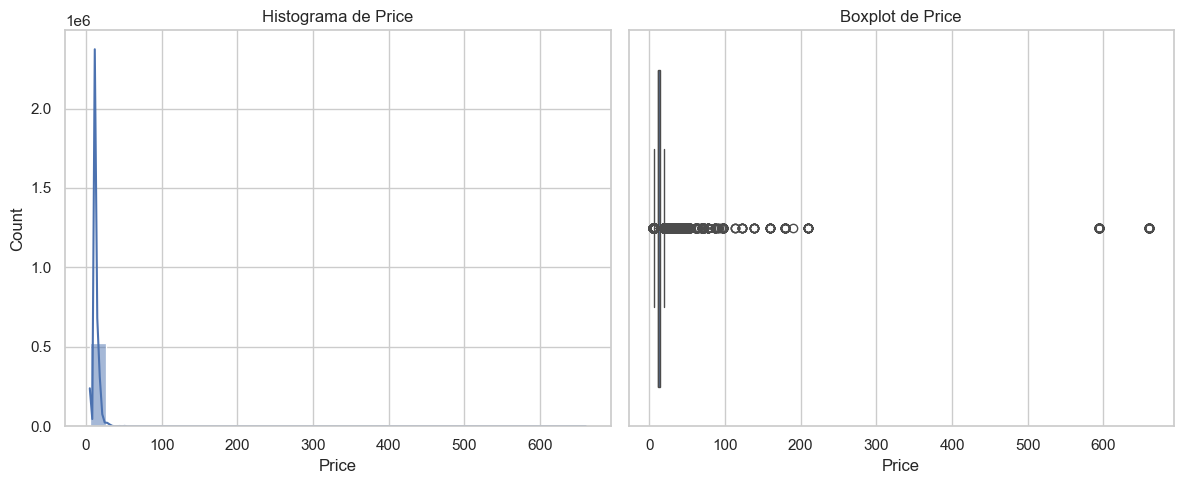

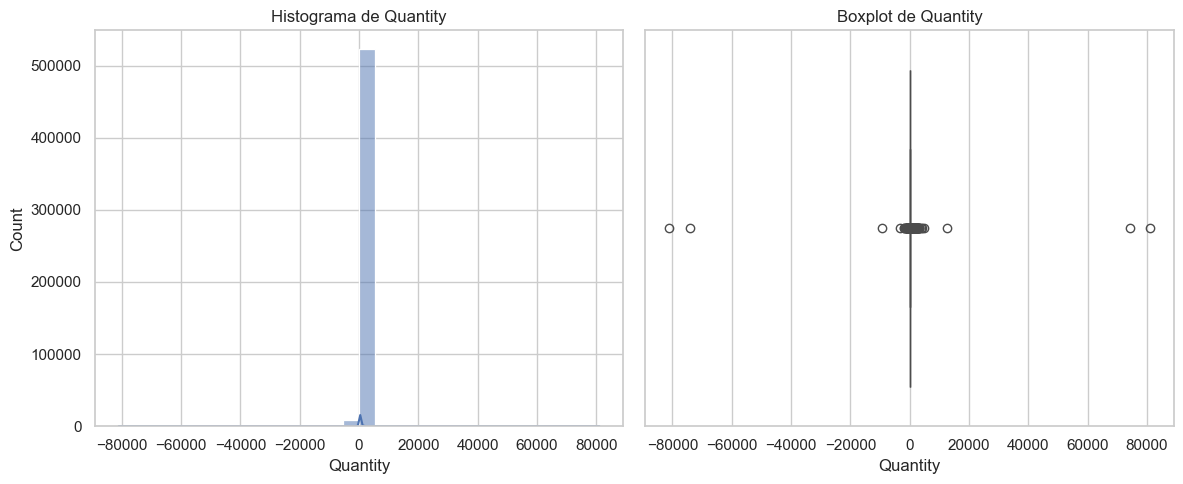

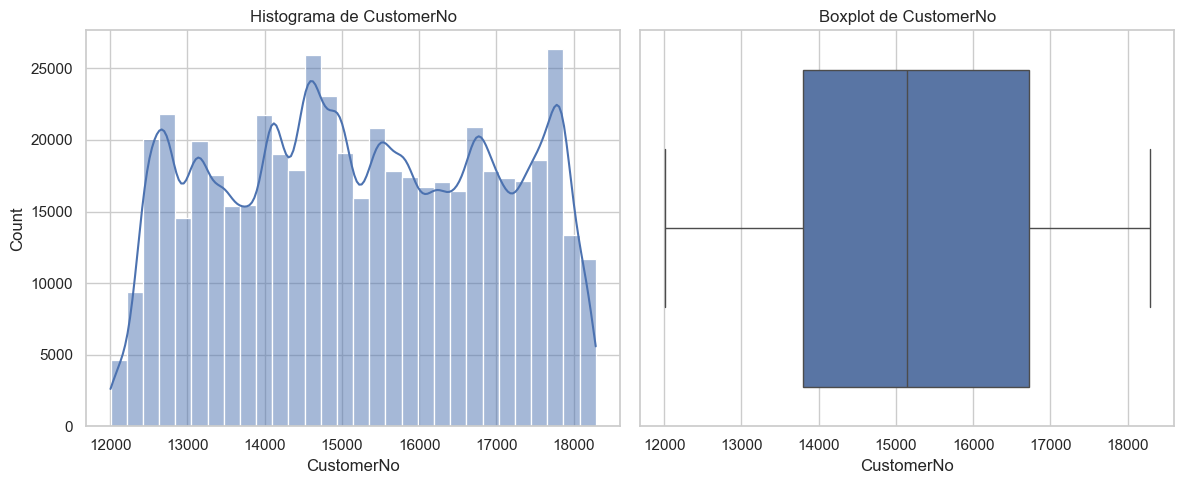

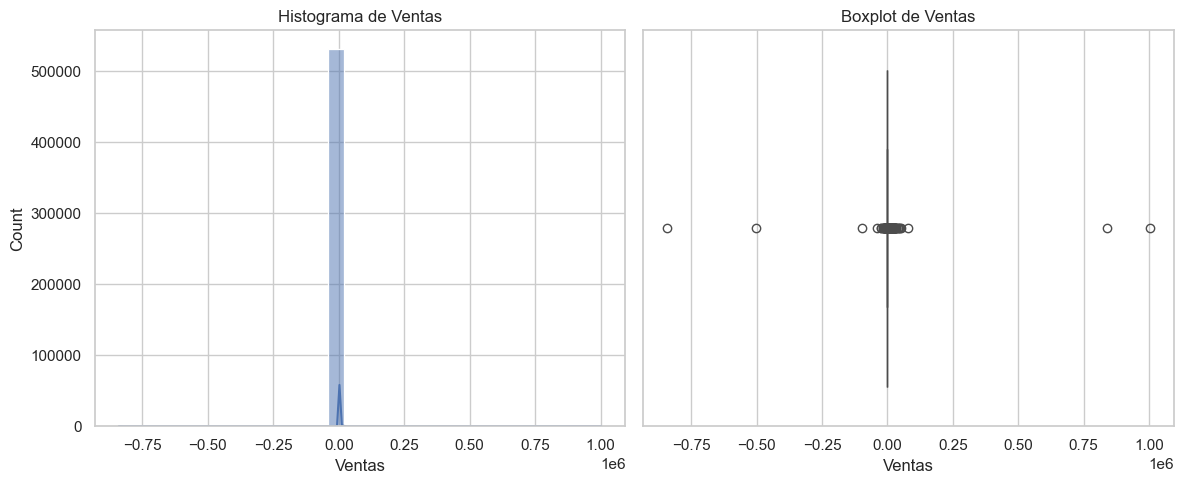

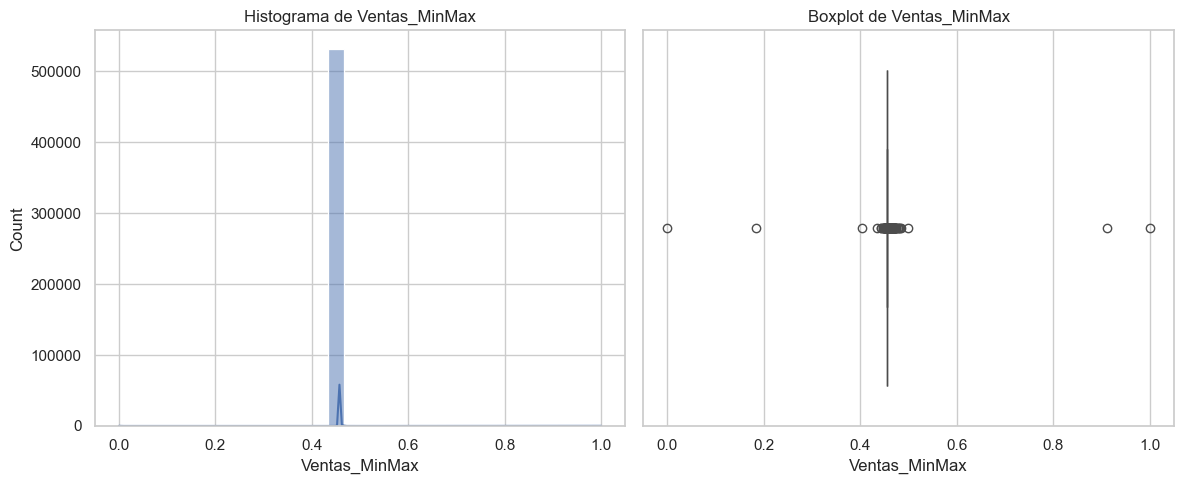

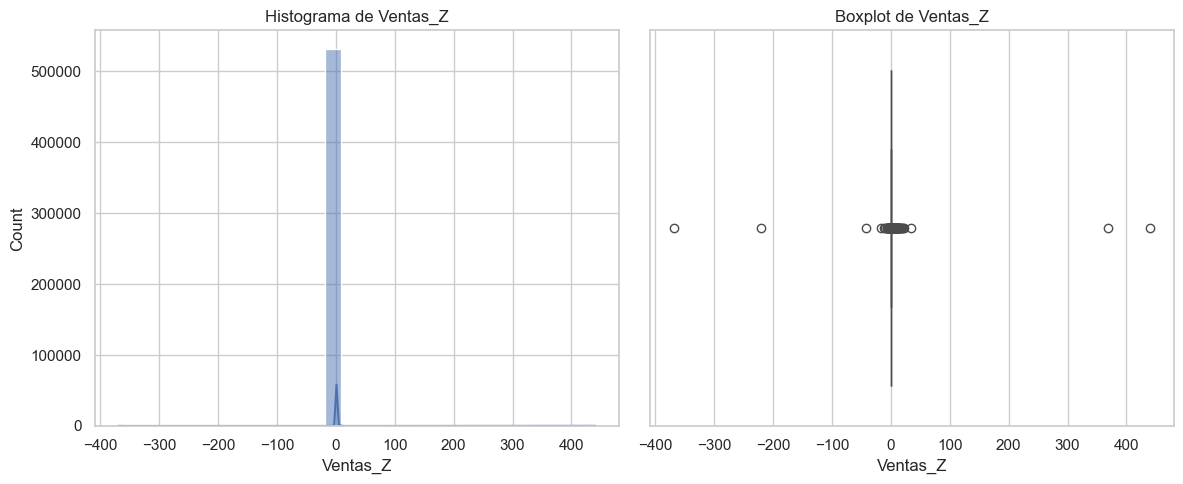

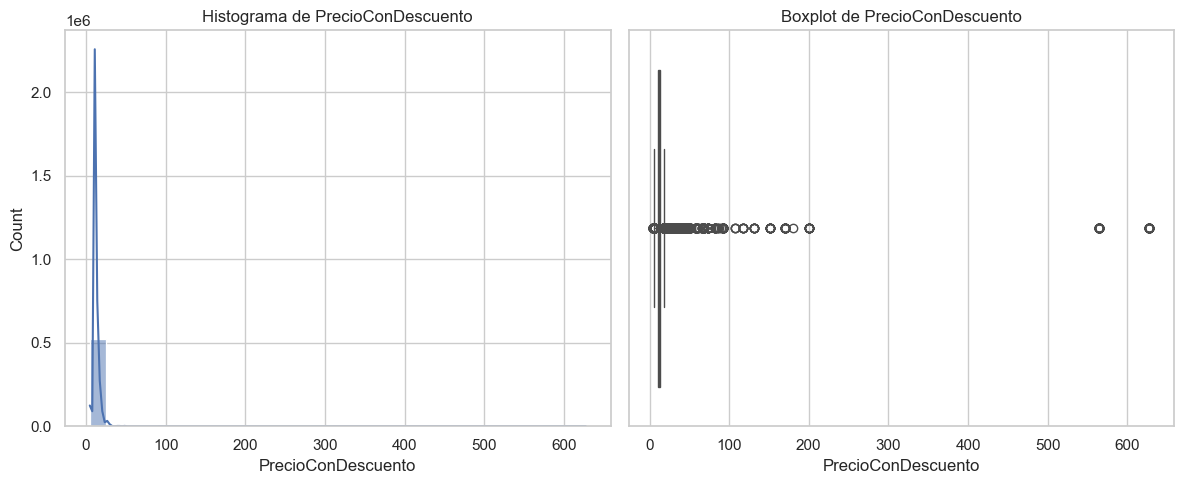

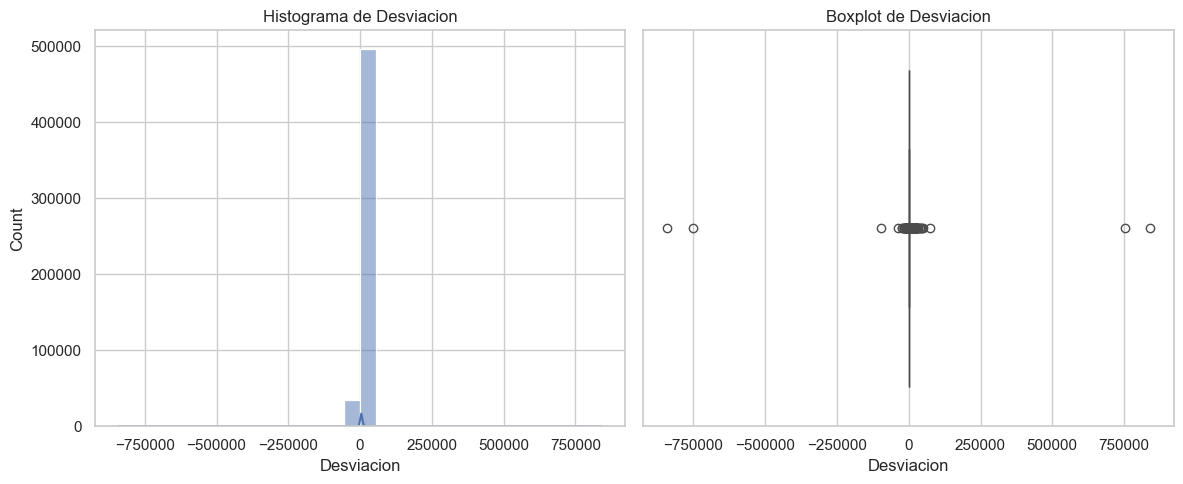

In [18]:
# Seleccionar columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Crear histogramas y boxplots para cada columna numérica
for col in numeric_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Histograma
    sns.histplot(df[col], bins=30, ax=axes[0], kde=True)
    axes[0].set_title(f'Histograma de {col}')
    
    # Boxplot
    sns.boxplot(data=df, x=col, ax=axes[1])
    axes[1].set_title(f'Boxplot de {col}')
    
    plt.tight_layout()
    plt.show()


**Gráficos de Línea para Tendencias de Ventas a lo Largo del Tiempo**

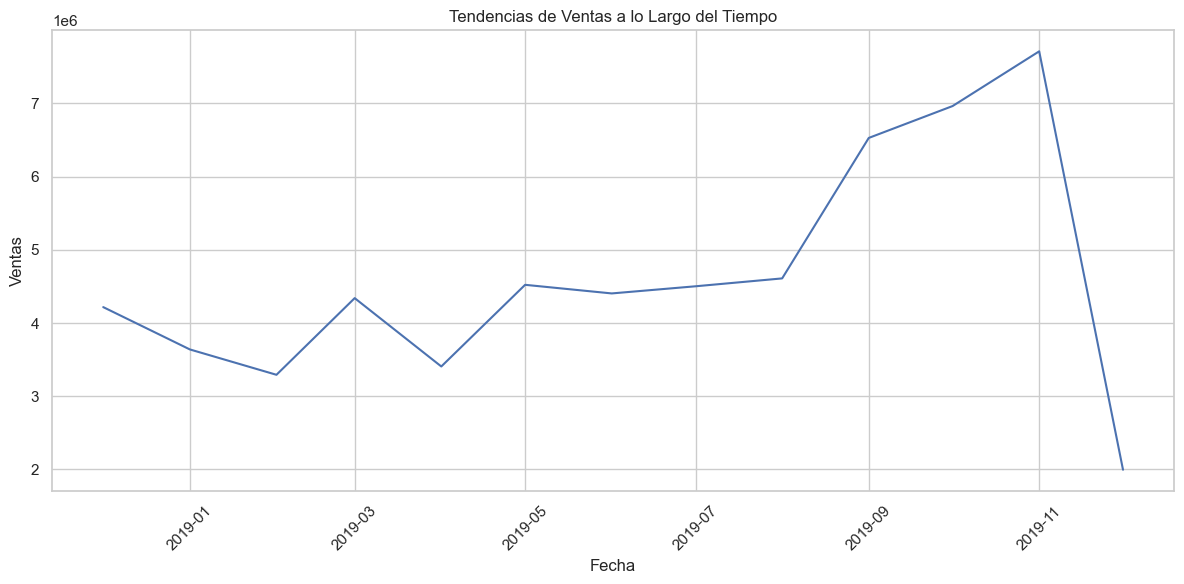

In [19]:
# Convertir la columna de fecha si aún no está en formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Agrupar las ventas por mes para ver tendencias mensuales
monthly_sales = df.groupby(df['Date'].dt.to_period("M")).Ventas.sum().to_timestamp()

# Gráfico de línea
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Tendencias de Ventas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Gráficos de Dispersión entre Variables**

c:\Users\user\.conda\envs\bootcamp_mitic\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


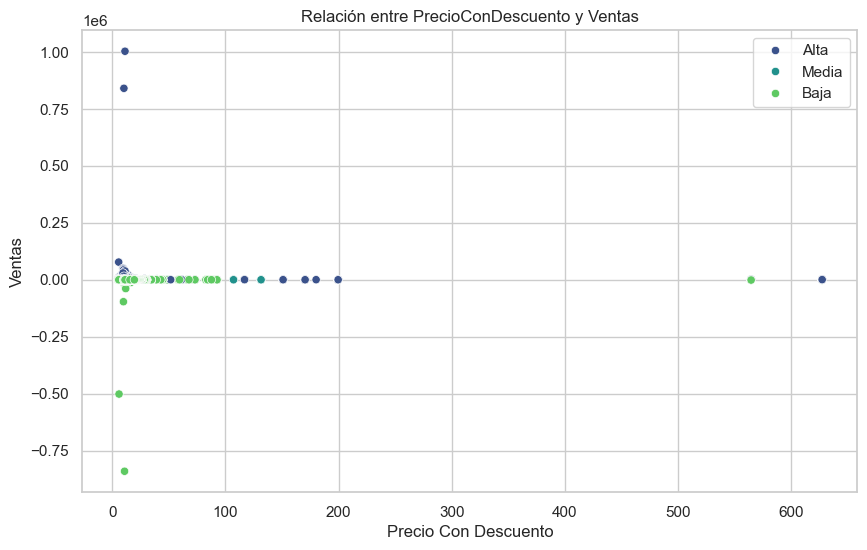

In [20]:
# Gráfico de dispersión entre Ventas y PrecioConDescuento
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PrecioConDescuento', y='Ventas', hue='clasificacion', palette='viridis')
plt.title('Relación entre PrecioConDescuento y Ventas')
plt.xlabel('Precio Con Descuento')
plt.ylabel('Ventas')
plt.legend()
plt.show()


**Combinación de Histogramas y Boxplots para Distribución de Ventas**

In [ ]:
# Histograma y Boxplot combinados para la columna Ventas
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)}, figsize=(10, 6))

# Boxplot
sns.boxplot(data=df, x='Ventas', ax=ax_box, color='skyblue')
ax_box.set(xlabel='')

# Histograma
sns.histplot(data=df, x='Ventas', kde=True, ax=ax_hist, color='skyblue')
ax_hist.set_xlabel('Ventas')
ax_hist.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()
